LAB2

1. Lag et mikrofonarray med geometri som i figur II.4. Velg d slik at alle mikrofonene får plass
på koblingsbrettet.

d = 6.5 midt til midt
d= = 5.5 kant til kant

2. Gjør et opptak av et lydsignal med de tre mikrofonene, og vis at de tre signalene ser ut som
forventet, dvs amplituden skal variere rundt 0∗
, og avhengig av hvilket signal du brukte skal
alle tre se ut som sinustoner, impulslyder, støysignaler, eller et slikt signal som du brukte.

importering av pakker som trengs

In [438]:
import numpy as np
import matplotlib.pyplot as plt
#from sympy import *
from raspi_import import raspi_import
import scipy.signal as sc

In [439]:
#hente inn data fra måling
#1000Hz_sinus_180G.bin klapp_0G.bin klapp_max21_1.bin


sample_period, data = raspi_import("klapp_30G_3.bin")

#juster data
k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k
data = data[5000:,:]*k 
data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet

fs = 1/sample_period

mic_1 = data[:,0] #ADC1
mic_2 = data[:,3] #ADC4
mic_3 = data[:,2] #ADC3

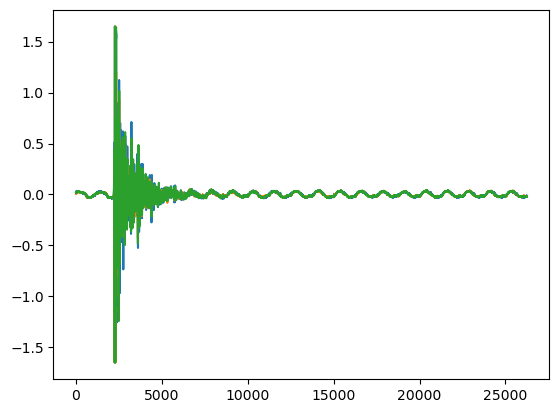

In [440]:
plt.plot(mic_1)

plt.plot(mic_2)

plt.plot(mic_3)
#plt.xlim(6415, 6435)
plt.show()

3. Implementer en krysskorrelasjonsberegning for de tre mikrofonsignalene. Finn tidsforsinkelsen
fra toppen av krysskorrelasjonen, uttrykkt i antall sampler og vis de tre krysskorrelasjonssignalene. Du må også vise et eksempel på et autokorrelasjonssignal. Sjekk at du får en topp for eksakt 0 sampels «lag». 
Er toppen for disse krysskorrelasjonssignalene innenfor et intervall som kan forventes, dvs
innenfor ±nmax, hvor nmax gis av avstand mellom mikrofonene, samplingfrekvensen og lydhastigheten?

Funksjon for auto og krysskorrelasjon

In [441]:
#Slower
#r_xy = np.correlate(x,y, mode='full')
#r_xy_abs = np.abs(r_xy)

In [442]:
#Faster
def krysskorrelasjon(x,y): #sett inn data fra ønskede mikrofoner
    r_xy = sc.correlate(x,y, mode='full', method='direct')
    print(f"Krysskorrelasjonen har en spike ved {np.argmax(r_xy)} \n")
    return r_xy

def autokorrelasjon(x):
    r_xx = sc.correlate(x, x, mode='full')
    print(f"Autokorrelasjonen har en spike ved {np.argmax(r_xx)} \n")
    return r_xx


Kode for tidsforsinkelse (delay)

In [443]:
def delay(x, y, micnr, another_micnr): #tar inn parametere x:ett av signalene, r_xy:krysskorrelsjonen
    r_xy_abs = np.abs(krysskorrelasjon(x,y))
    l_max = np.argmax(r_xy_abs) - (len(x) - 1)
    delta_t = l_max/fs
    delta_t = - delta_t
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i sekunder: {delta_t} s \n")
    return delta_t #enhet sekunder

def delay_samples(x, y, micnr, another_micnr):
    n_samples = np.argmax(krysskorrelasjon(x,y)) - np.argmax(autokorrelasjon(x))
    n_samples = - n_samples
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i antall samples: {n_samples} \n")
    return n_samples #enhet antall samples

def delay_samples2(x, y, micnr, another_micnr):
    n_samples = np.argmax(np.abs(krysskorrelasjon(x,y))) - (len(x) - 1)
    n_samples = - n_samples
    print(f"Delay mellom mikrofon mic {micnr} og mic {another_micnr} i antall samples: {n_samples} \n")
    return n_samples

Plot av teori ang krysskorrelasjon

Krysskorrelasjonen har en spike ved 951 

Krysskorrelasjonen har en spike ved 1047 

Delay mellom mikrofon mic x og mic y i sekunder: -0.001536 s 

Krysskorrelasjonen har en spike ved 1047 

Autokorrelasjonen har en spike ved 999 

Delay mellom mikrofon mic x og mic y i antall samples: -48 

Krysskorrelasjonen har en spike ved 1047 

Delay mellom mikrofon mic x og mic y i antall samples: -48 



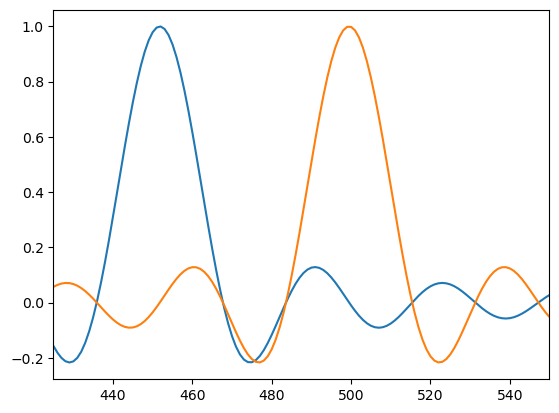

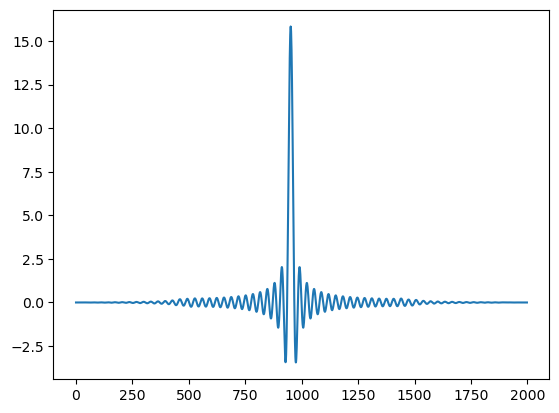

In [444]:
t = np.linspace(-5,5, 1000)*np.pi*2
x= np.sinc(t+3)
y= np.sinc(t)
r_xy = krysskorrelasjon(x,y)

delay(y,x, "x", "y")
delay_samples(y,x, "x", "y")
delay_samples2(y,x, "x", "y")

plt.plot(x)
plt.plot(y)
plt.xlim(425, 550)
plt.show()
plt.plot(r_xy)
plt.show()

Utregning av krysskorrelasjon mellom dataen fra mikrofonene

In [445]:
r_21 = krysskorrelasjon(mic_2,mic_1)
r_31 = krysskorrelasjon(mic_3,mic_1)
r_32 = krysskorrelasjon(mic_3,mic_2)

Krysskorrelasjonen har en spike ved 26253 

Krysskorrelasjonen har en spike ved 26249 

Krysskorrelasjonen har en spike ved 26245 



Plot av krysskorrelasjoner

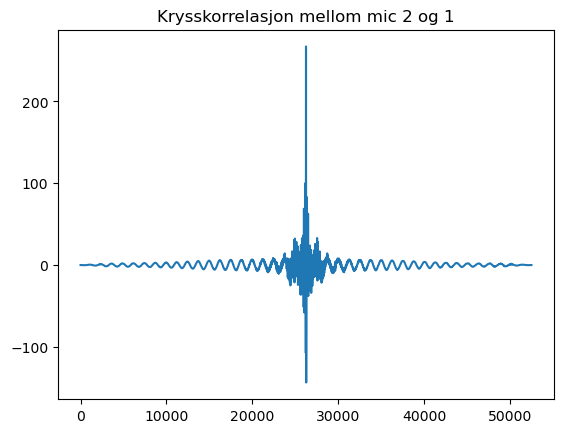

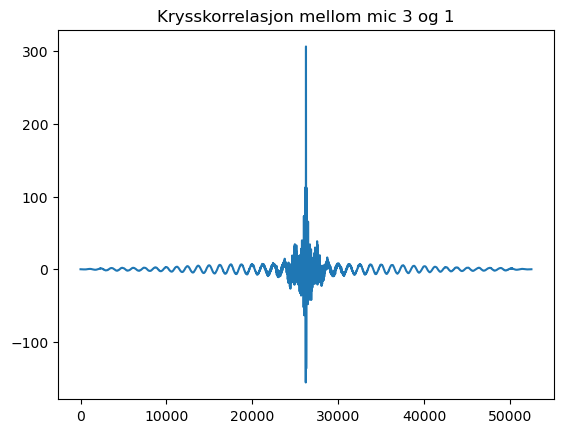

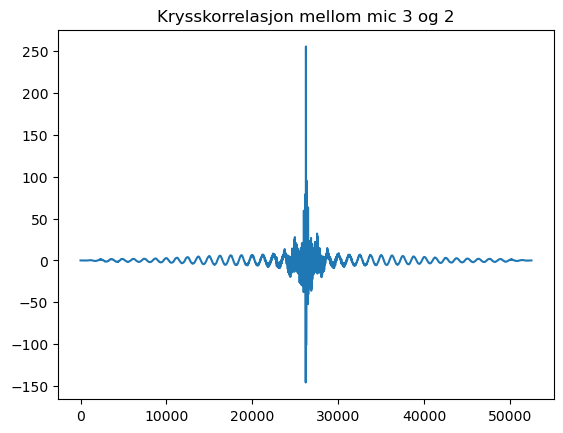

Krysskorrelasjonen har en spike ved 26253 

Delay mellom mikrofon mic 2 og mic 1 i antall samples: -4 

Krysskorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 1 i antall samples: 0 

Krysskorrelasjonen har en spike ved 26245 

Delay mellom mikrofon mic 3 og mic 2 i antall samples: 4 



4

In [446]:
plt.plot(r_21)
plt.title("Krysskorrelasjon mellom mic 2 og 1")
plt.show()

plt.plot(r_31)
plt.title("Krysskorrelasjon mellom mic 3 og 1")
plt.show()

plt.plot(r_32)
plt.title("Krysskorrelasjon mellom mic 3 og 2")
plt.show()

delay_samples2(mic_2,mic_1, "2", "1")
delay_samples2(mic_3, mic_1, "3", "1")
delay_samples2(mic_3, mic_2, "3", "2")

Utregning av autokorrelasjoner

In [447]:
r_11 = autokorrelasjon(mic_1) 
r_22 = autokorrelasjon(mic_2)
r_33 = autokorrelasjon(mic_3)

Autokorrelasjonen har en spike ved 26249 

Autokorrelasjonen har en spike ved 26249 

Autokorrelasjonen har en spike ved 26249 



Plot av autokorrelajoner

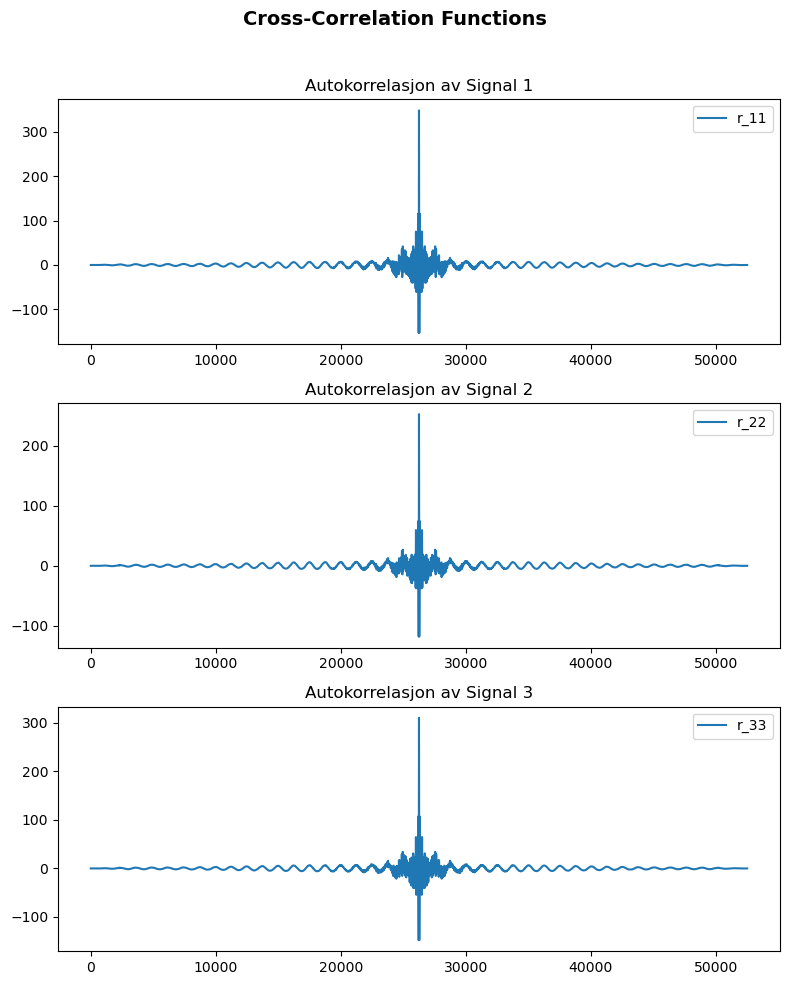

Krysskorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 1 og mic 1 i sekunder: -0.0 s 

Krysskorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 1 og mic 1 i antall samples: 0 

Krysskorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 2 og mic 2 i antall samples: 0 

Krysskorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 3 i antall samples: 0 



0

In [448]:
# Create a new figure
plt.figure(figsize=(8, 10))  # Adjust size as needed

# Common title
plt.suptitle("Cross-Correlation Functions", fontsize=14, fontweight='bold')

# First plot
plt.subplot(3, 1, 1)  # (rows, columns, index)
plt.plot(r_11, label="r_11")
plt.title("Autokorrelasjon av Signal 1")
plt.legend()

# Second plot
plt.subplot(3, 1, 2)
plt.plot(r_22, label="r_22")
plt.title("Autokorrelasjon av Signal 2")
plt.legend()

# Third plot
plt.subplot(3, 1, 3)
plt.plot(r_33, label="r_33")
plt.title("Autokorrelasjon av Signal 3")
plt.legend()

# Show all plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

delay(mic_1, mic_1, "1", "1")

delay_samples2(mic_1, mic_1, "1", "1")
delay_samples2(mic_2,mic_2, "2", "2")
delay_samples2(mic_3, mic_3, "3", "3")




4) Beregn innfallsvinkelen (i planet som de tre mikrofonene er plassert) fra de tre tidsforsinkelsene. Vis at du kan detektere innfallsvinkel fra −180 til +180 grader

In [449]:
def theta(n_21, n_31, n_32):
    if ((n_31 - n_21 + 2*n_32) < 0):
        theta = ( -np.arctan((np.sqrt(3) * (n_31 + n_21))/((n_31 - n_21 + 2*n_32) + 1e-10))  ) + np.pi # legger til + 1e-10 for å ikke dele på 0 i arctan funk
    else:
        theta = ( -np.arctan((np.sqrt(3) * (n_31 + n_21))/((n_31 - n_21 + 2*n_32) + 1e-10))  ) 

    theta = theta * (180/np.pi)  
    print(f"Innfallsvinkelen theta er på {theta} grader\n\n\n")

    return theta


n_21 = delay_samples(mic_2, mic_1, 2, 1)
n_31 = delay_samples(mic_3, mic_1, 3, 1)
n_32 = delay_samples(mic_3, mic_2, 3, 2)

theta(n_21, n_31, n_32)


Krysskorrelasjonen har en spike ved 26253 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 2 og mic 1 i antall samples: -4 

Krysskorrelasjonen har en spike ved 26249 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 1 i antall samples: 0 

Krysskorrelasjonen har en spike ved 26245 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 2 i antall samples: 4 

Innfallsvinkelen theta er på 29.99999999979325 grader





29.99999999979325

In [450]:
#kladd theta kode

""" def theta2(n_21, n_31, n_32):
    if ((n_31 - n_21 + 2*n_32) < 0):
        theta = ( -np.arctan2(np.sqrt(3) * (n_31 + n_21), (n_31 - n_21 + 2*n_32) + 1e-10)  ) #+ np.pi # legger til + 1e-10 for å ikke dele på 0 i arctan funk
    else:
        theta = ( -np.arctan2(np.sqrt(3) * (n_31 + n_21), (n_31 - n_21 + 2*n_32) + 1e-10)  )

    theta = theta * (180/np.pi)  
    print(f"Innfallsvinkelen theta er på {theta} grader\n\n\n")
    return theta """

""" mode = "klapp"
for i in [0, 45, 90, 135, 180, "m135", "m90", "m45"]:
    sample_period, data = raspi_import(mode+ "_" + str(i) + "G.bin")

    #juster data
    k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k
    data = data[5000:,:]*k 
    data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet

    fs = 1/sample_period

    mic_1 = data[:,0] #ADC1
    mic_2 = data[:,3] #ADC4
    mic_3 = data[:,2] #ADC3

    n_21 = delay_samples(mic_2, mic_1, 2, 1)
    n_31 = delay_samples(mic_3, mic_1, 3, 1)
    n_32 = delay_samples(mic_3, mic_1, 3, 2)       

    theta(n_21, n_31, n_32) """  

    


' mode = "klapp"\nfor i in [0, 45, 90, 135, 180, "m135", "m90", "m45"]:\n    sample_period, data = raspi_import(mode+ "_" + str(i) + "G.bin")\n\n    #juster data\n    k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k\n    data = data[5000:,:]*k \n    data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet\n\n    fs = 1/sample_period\n\n    mic_1 = data[:,0] #ADC1\n    mic_2 = data[:,3] #ADC4\n    mic_3 = data[:,2] #ADC3\n\n    n_21 = delay_samples(mic_2, mic_1, 2, 1)\n    n_31 = delay_samples(mic_3, mic_1, 3, 1)\n    n_32 = delay_samples(mic_3, mic_1, 3, 2)       \n\n    theta(n_21, n_31, n_32) '

In [451]:
# ==== TEST av vinkel for kun 1 fil av gangen ====

#Tror det er noe galt i hvordan delay i samples blir regnet ut. Er steder det burde vært negativt hvor det ikke er det
#Stoler heller ikke heeeelt på theta funksjonen, ettersom jeg har prøvd med teoretiske verdier og ish samples, og fått helt feil vinkel

""" sample_period, data = raspi_import(".bin")


k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k
data = data[5000:,:]*k 
data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet

fs = 1/sample_period

mic_1 = data[:,0] #ADC1
mic_2 = data[:,3] #ADC4
mic_3 = data[:,2] #ADC3 

n_21 = delay_samples(mic_2, mic_1, 2, 1)
n_31 = delay_samples(mic_3, mic_1, 3, 1)
n_32 = delay_samples(mic_3, mic_2, 3, 2)

theta(n_21, n_31, n_32)
"""

' sample_period, data = raspi_import(".bin")\n\n\nk= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k\ndata = data[5000:,:]*k \ndata = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet\n\nfs = 1/sample_period\n\nmic_1 = data[:,0] #ADC1\nmic_2 = data[:,3] #ADC4\nmic_3 = data[:,2] #ADC3 \n\nn_21 = delay_samples(mic_2, mic_1, 2, 1)\nn_31 = delay_samples(mic_3, mic_1, 3, 1)\nn_32 = delay_samples(mic_3, mic_2, 3, 2)\n\ntheta(n_21, n_31, n_32)\n'

5. Gjør en systematisk variasjon av estimert innfallsvinkel for flere innfallsvinkler. Gjør flere,
minimum 5, gjentatte målinger for samme innfallsvinkel for å få et mål på usikkerheten.
Standardavviket og variansen er mål som godkjennes. Gjør dette for minimum 3 forskjellige
vinkler

In [452]:
#Functions to calculate the variance and STD
def standardavvik(deg_vec):
    std = np.std(deg_vec, ddof=1)
    return std


def varians(deg_vec):
    var = np.var(deg_vec)
    return var
    

In [454]:
vecs = {
    30: [],
    150: [],
    "m40": []
}

mode = "klapp"
for i in [30, 150, "m40"]:
    for j in [1, 2, 3, 4, 7]:
        sample_period, data = raspi_import(mode + "_" + str(i) +  "G_" + str(j) + ".bin")

        #juster data
        k= 3.3/4096 #2^12 pga 12-bits ADC bit_signal = Signal/k
        data = data[5000:,:]*k 
        data = data - np.mean(data, axis=0) #fjerner DC-komponenten til signalet

        fs = 1/sample_period

        mic_1 = data[:,0] #ADC1
        mic_2 = data[:,3] #ADC4
        mic_3 = data[:,2] #ADC3

        n_21 = delay_samples(mic_2, mic_1, 2, 1)
        n_31 = delay_samples(mic_3, mic_1, 3, 1)
        n_32 = delay_samples(mic_3, mic_2, 3, 2)       

        vecs[i].append(theta(n_21, n_31, n_32))



print(vecs[30], vecs["m40"], vecs[150])

std_30 = standardavvik(vecs[30])
var_30 = varians(vecs[30])

print(f"std: {std_30}, var: {var_30}")

std_150 = standardavvik(vecs[150])
var_150 = varians(vecs[150])

print(f"std: {std_150}, var: {var_150}")

std_m40 = standardavvik(vecs["m40"])
var_m40 = varians(vecs["m40"])

print(f"std: {std_m40}, var: {var_m40}")

Krysskorrelasjonen har en spike ved 26253 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 2 og mic 1 i antall samples: -4 

Krysskorrelasjonen har en spike ved 26250 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 1 i antall samples: -1 

Krysskorrelasjonen har en spike ved 26245 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 2 i antall samples: 4 

Innfallsvinkelen theta er på 38.213210701485025 grader



Krysskorrelasjonen har en spike ved 26253 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 2 og mic 1 i antall samples: -4 

Krysskorrelasjonen har en spike ved 26249 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 1 i antall samples: 0 

Krysskorrelasjonen har en spike ved 26245 

Autokorrelasjonen har en spike ved 26249 

Delay mellom mikrofon mic 3 og mic 2 i antall samples: 4 

Innfallsvinkelen theta er på 29.99999999979325 grader



Kryssk